   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

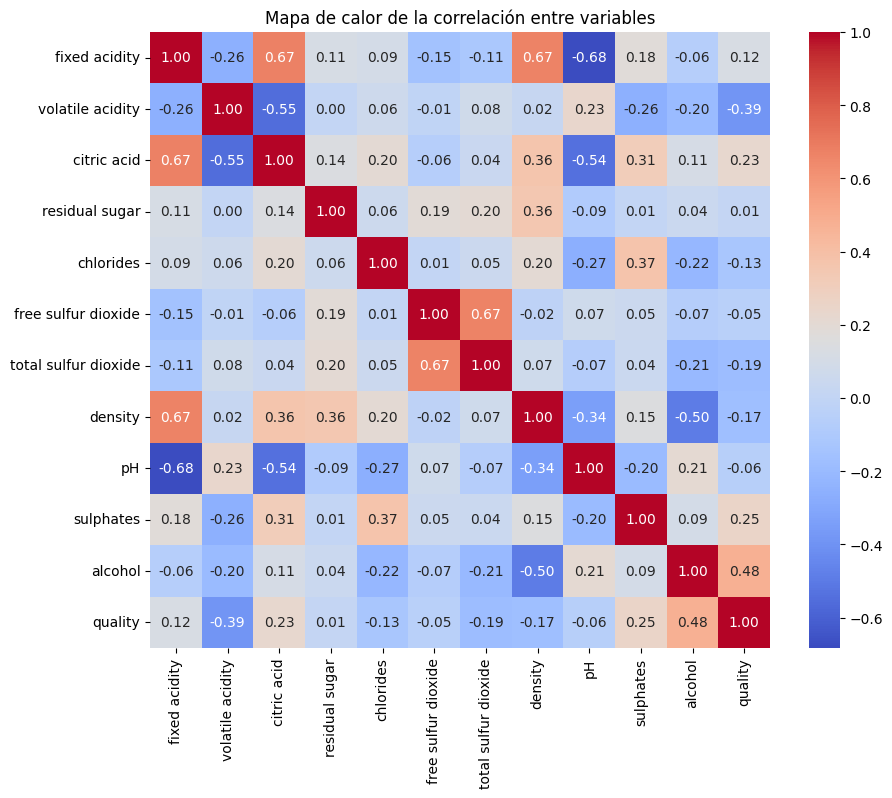

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
data = pd.read_csv("./winequality-red.csv")

# Visualizar las primeras filas del dataset
print(data.head())

# Mostrar información general sobre el dataset
print(data.info())
print(data.describe())

# Mapa de calor para ver correlaciones entre variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Mapa de calor de la correlación entre variables")
plt.show()


In [10]:
# Comprobar valores nulos en el dataset
print(data.isnull().sum())

# Eliminar filas o columnas con valores faltantes (si es necesario)
data = data.dropna()

# Separar las variables predictoras y la variable objetivo ('quality')
X = data.drop("quality", axis=1)  # Variables independientes
y = data["quality"]  # Variable dependiente


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [11]:
from sklearn.feature_selection import SelectKBest, f_classif

# Selección de las mejores características
selector = SelectKBest(score_func=f_classif, k=8)
X_new = selector.fit_transform(X, y)

# Muestra las puntuaciones de cada característica seleccionada
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)


Características seleccionadas: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'sulphates', 'alcohol'],
      dtype='object')


In [12]:
from sklearn.model_selection import train_test_split

# División en entrenamiento y prueba (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)


In [13]:
from sklearn.tree import DecisionTreeClassifier

# Crear y configurar el modelo de árbol de decisión
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

# Realizar predicciones
y_pred = dt_model.predict(X_test)

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión (Texto):")
print(cm)

Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.62      0.74      0.67       195
           6       0.52      0.55      0.53       200
           7       0.44      0.26      0.33        61
           8       0.00      0.00      0.00         6

    accuracy                           0.56       480
   macro avg       0.26      0.26      0.26       480
weighted avg       0.52      0.56      0.54       480

Matriz de Confusión (Texto):
[[  0   0   1   0   0   0]
 [  0   0   8   9   0   0]
 [  0   0 144  49   2   0]
 [  0   0  75 110  15   0]
 [  0   0   4  41  16   0]
 [  0   0   0   3   3   0]]


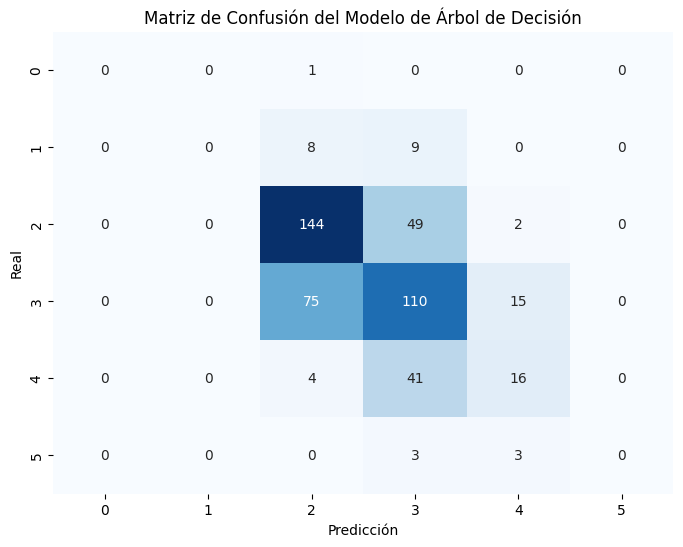

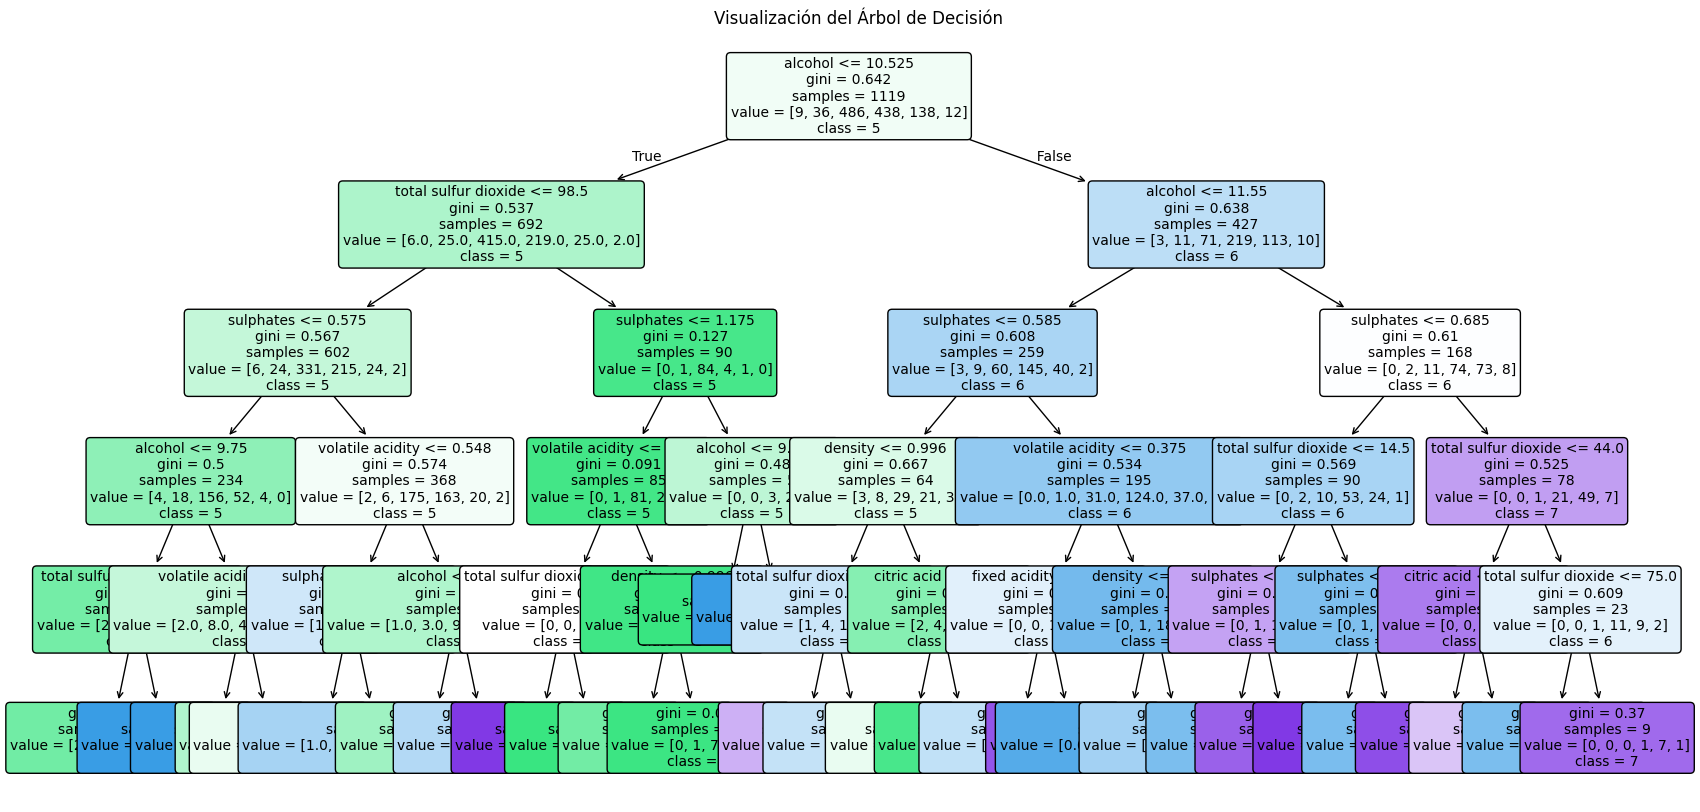

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión del Modelo de Árbol de Decisión")
plt.show()

# Visualización del árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=selected_features,
    class_names=[str(cls) for cls in sorted(y.unique())],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Visualización del Árbol de Decisión")
plt.show()
